# Simple Custom dataset


## Setup

In [1]:
import numpy as np
import sys
from tensorflow import keras
from tensorflow.keras import layers
import sklearn.model_selection
import matplotlib.pyplot as plt

## Prepare the data

In [2]:
# Shows smiley as an image. 'smiley' should be an element in 'images'
def show_smiley(smiley, label):
    plt.xticks([])
    plt.yticks([])
    t = "sad" if label else "happy"
    c = "r" if label else "g"
    plt.imshow(smiley, cmap="Greys")
    plt.text(0.1, 0.1, t, size=8, color=c)

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

from random import randint

def blank(height=9, width=9):
    return [[0. for x in range(width)] for y in range(height)]

def bound(x, l=0, h=10):
    if x < l:
        return l
    if x > h:
        return h
    return x

def draw_feature(canvas, feature, origin=(0,0)):
  (x0, y0) = origin
  for (x, y) in feature:
      canvas[x0 + x][y0 + y] = 1.

def draw_face(eyes, mouth, noise):
  canvas = blank()
  #draw eyes
  draw_feature(canvas, eyes)
  draw_feature(canvas, mouth)
  draw_feature(canvas, noise)
  return canvas


def print_face(face):
    for line in face:
        for x in line:
            print ('X' if x == 1.0 else '.', end='')
        print('')
    print('')


def make_data(noise=False):
  x_train = np.ndarray(shape=(0,))
  y_train = np.ndarray(shape=(0,))

  eyes_variants = [
      [(2, 0), (2, 4)],
      [(2, 1), (2, 5)],
      [(2, 2), (2, 6)],
      [(2, 3), (2, 7)],
      [(2, 4), (2, 8)],
      
      [(2, 0), (2, 6)],
      [(2, 1), (2, 7)],
      [(2, 2), (2, 8)],
      
      [(2, 0), (2, 5)],
      [(2, 1), (2, 6)],
      [(2, 2), (2, 7)],
      [(2, 3), (2, 8)],
      
      [(1, 0), (1, 4)],
      [(1, 1), (1, 5)],
      [(1, 2), (1, 6)],
      [(1, 3), (1, 7)],
      [(1, 4), (1, 8)],
      
      [(1, 0), (1, 6)],
      [(1, 1), (1, 7)],
      [(1, 2), (1, 8)],
      
      [(1, 0), (1, 5)],
      [(1, 1), (1, 6)],
      [(1, 2), (1, 7)],
      [(1, 3), (1, 8)],
  ]

  noise_variants = [
      [],
      [(0, 0)],
      [(0, 8)],
      [(8, 0)],
      [(8, 8)]
  ]

  happy_mouths = [
      [(4, 1), (5, 2), (6, 3), (6, 4),(6, 5),(5, 6),(4, 7)],
      [(5, 1), (6, 2), (7, 3), (7, 4),(7, 5),(6, 6),(5, 7)],
      [(6, 1), (7, 2), (8, 3), (8, 4),(8, 5),(7, 6),(6, 7)],
      
      [(4, 0), (5, 1), (6, 2), (6, 3),(6, 4),(5, 5),(4, 6)],
      [(5, 0), (6, 1), (7, 2), (7, 3),(7, 4),(6, 5),(5, 6)],
      [(6, 0), (7, 1), (8, 2), (8, 3),(8, 4),(7, 5),(6, 6)],
      
      [(4, 2), (5, 3), (6, 4), (6, 5),(6, 6),(5, 7),(4, 8)],
      [(5, 2), (6, 3), (7, 4), (7, 5),(7, 6),(6, 7),(5, 8)],
      [(6, 2), (7, 3), (8, 4), (8, 5),(8, 6),(7, 7),(6, 8)],

      [(4, 1), (5, 2), (5, 3), (5, 4),(5, 5),(5, 6),(4, 7)],
      [(5, 1), (6, 2), (6, 3), (6, 4),(6, 5),(6, 6),(5, 7)],
      [(6, 1), (7, 2), (7, 3), (7, 4),(7, 5),(7, 6),(6, 7)],
      
      [(4, 0), (5, 1), (5, 2), (5, 3),(5, 4),(5, 5),(4, 6)],
      [(5, 0), (6, 1), (6, 2), (6, 3),(6, 4),(6, 5),(5, 6)],
      [(6, 0), (7, 1), (7, 2), (7, 3),(7, 4),(7, 5),(6, 6)],
      
      [(4, 2), (5, 3), (5, 4), (5, 5),(5, 6),(5, 7),(4, 8)],
      [(5, 2), (6, 3), (6, 4), (6, 5),(6, 6),(6, 7),(5, 8)],
      [(6, 2), (7, 3), (7, 4), (7, 5),(7, 6),(7, 7),(6, 8)],
      
      [(7, 2), (8, 3), (8, 4), (8, 5), (7, 6)],
      [(6, 2), (7, 3), (7, 4), (7, 5), (6, 6)],
      [(5, 2), (6, 3), (6, 4), (6, 5), (5, 6)],
      [(4, 2), (5, 3), (5, 4), (5, 5), (4, 6)],
      
      [(7, 0), (8, 1), (8, 2), (8, 3), (7, 4)],
      [(6, 0), (7, 1), (7, 2), (7, 3), (6, 4)],
      [(5, 0), (6, 1), (6, 2), (6, 3), (5, 4)],
      [(4, 0), (5, 1), (5, 2), (5, 3), (4, 4)],
      
      [(7, 1), (8, 2), (8, 3), (8, 4), (7, 5)],
      [(6, 1), (7, 2), (7, 3), (7, 4), (6, 5)],
      [(5, 1), (6, 2), (6, 3), (6, 4), (5, 5)],
      [(4, 1), (5, 2), (5, 3), (5, 4), (4, 5)],
      
      [(7, 3), (8, 4), (8, 5), (8, 6), (7, 7)],
      [(6, 3), (7, 4), (7, 5), (7, 6), (6, 7)],
      [(5, 3), (6, 4), (6, 5), (6, 6), (5, 7)],
      [(4, 3), (5, 4), (5, 5), (5, 6), (4, 7)],
      
      [(7, 4), (8, 5), (8, 6), (8, 7), (7, 8)],
      [(6, 4), (7, 5), (7, 6), (7, 7), (6, 8)],
      [(5, 4), (6, 5), (6, 6), (6, 7), (5, 8)],
      [(4, 4), (5, 5), (5, 6), (5, 7), (4, 8)]
      
  ]

  sad_mouths = [
      [(5, 1), (4, 2), (4, 3), (4, 4),(4, 5),(4, 6),(5, 7)],
      [(6, 1), (5, 2), (5, 3), (5, 4),(5, 5),(5, 6),(6, 7)],
      [(7, 1), (6, 2), (6, 3), (6, 4),(6, 5),(6, 6),(7, 7)],
      
      [(5, 0), (4, 1), (4, 2), (4, 3),(4, 4),(4, 5),(5, 6)],
      [(6, 0), (5, 1), (5, 2), (5, 3),(5, 4),(5, 5),(6, 6)],
      [(7, 0), (6, 1), (6, 2), (6, 3),(6, 4),(6, 5),(7, 6)],
      
      [(5, 2), (4, 3), (4, 4), (4, 5),(4, 6),(4, 7),(5, 8)],
      [(6, 2), (5, 3), (5, 4), (5, 5),(5, 6),(5, 7),(6, 8)],
      [(7, 2), (6, 3), (6, 4), (6, 5),(6, 6),(6, 7),(7, 8)],

      [(6, 1), (5, 2), (4, 3), (4, 4),(4, 5),(5, 6),(6, 7)],
      [(7, 1), (6, 2), (5, 3), (5, 4),(5, 5),(6, 6),(7, 7)],
      [(8, 1), (7, 2), (6, 3), (6, 4),(6, 5),(7, 6),(8, 7)],
      
      [(6, 0), (5, 1), (4, 2), (4, 3),(4, 4),(5, 5),(6, 6)],
      [(7, 0), (6, 1), (5, 2), (5, 3),(5, 4),(6, 5),(7, 6)],
      [(8, 0), (7, 1), (6, 2), (6, 3),(6, 4),(7, 5),(8, 6)],
      
      [(6, 2), (5, 3), (4, 4), (4, 5),(4, 6),(5, 7),(6, 8)],
      [(7, 2), (6, 3), (5, 4), (5, 5),(5, 6),(6, 7),(7, 8)],
      [(8, 2), (7, 3), (6, 4), (6, 5),(6, 6),(7, 7),(8, 8)],
      
      [(8, 2), (7, 3), (7, 4), (7, 5), (8, 6)],
      [(7, 2), (6, 3), (6, 4), (6, 5), (7, 6)],
      [(6, 2), (5, 3), (5, 4), (5, 5), (6, 6)],
      [(5, 2), (4, 3), (4, 4), (4, 5), (5, 6)],
      
      [(8, 0), (7, 1), (7, 2), (7, 3), (8, 4)],
      [(7, 0), (6, 1), (6, 2), (6, 3), (7, 4)],
      [(6, 0), (5, 1), (5, 2), (5, 3), (6, 4)],
      [(5, 0), (4, 1), (4, 2), (4, 3), (5, 4)],
      
      [(8, 1), (7, 2), (7, 3), (7, 4), (8, 5)],
      [(7, 1), (6, 2), (6, 3), (6, 4), (7, 5)],
      [(6, 1), (5, 2), (5, 3), (5, 4), (6, 5)],
      [(5, 1), (4, 2), (4, 3), (4, 4), (5, 5)],
      
      [(8, 3), (7, 4), (7, 5), (7, 6), (8, 7)],
      [(7, 3), (6, 4), (6, 5), (6, 6), (7, 7)],
      [(6, 3), (5, 4), (5, 5), (5, 6), (6, 7)],
      [(5, 3), (4, 4), (4, 5), (4, 6), (5, 7)],
      
      [(8, 4), (7, 5), (7, 6), (7, 7), (8, 8)],
      [(7, 4), (6, 5), (6, 6), (6, 7), (7, 8)],
      [(6, 4), (5, 5), (5, 6), (5, 7), (6, 8)],
      [(5, 4), (4, 5), (4, 6), (4, 7), (5, 8)]
      
  ]
  
  for noise in noise_variants:
    for mouth in happy_mouths:
      for eyes in eyes_variants:
        #   if noise:
        #     noise = noise_variants[randint(0, len(noise_variants - 1))]
        #   else: 
        #     noise = []
        face = draw_face(eyes, mouth, noise)
        face = np.array(face)
        face.shape = (1, 9, 9, 1)
        x_train = np.concatenate((x_train, face), axis=0) if x_train.size else face
        y_train = np.append(y_train, 0)
    for mouth in sad_mouths:
      for eyes in eyes_variants:
        #   if noise:
        #     noise = noise_variants[randint(0, len(noise_variants - 1))]
        #   else: 
        #     noise = []
        face = draw_face(eyes, mouth, noise)
        face = np.array(face)
        face.shape = (1, 9, 9, 1)
        x_train = np.concatenate((x_train, face), axis=0) if x_train.size else face
        y_train = np.append(y_train, 1)

  x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=0)

  return (x_train, y_train), (x_test, y_test)

In [4]:
# Model / data parameters
num_classes = 2
input_shape = (9, 9, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = make_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (6840, 9, 9, 1)
6840 train samples
2280 test samples


No. of samples:  9120


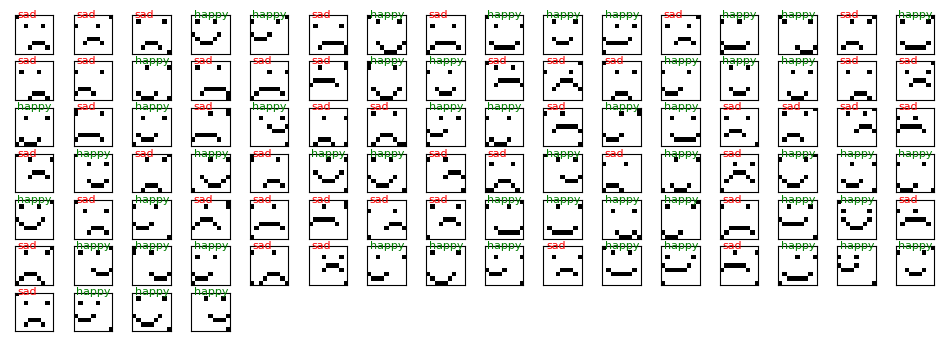

In [5]:
print("No. of samples: ", x_train.shape[0] + x_test.shape[0])
plt.figure(figsize=(12, 96))
for i, x in enumerate(x_train[:100]):
    plt.subplot(160, 16, i+1)
    show_smiley(x, y_train[i])

In [6]:
smiley_X_new = np.append(x_train, x_test, axis=0)
smiley_y_new = np.append(y_train, y_test, axis=0)
print("smiley_X_new shape: ", smiley_X_new.shape)
print("smiley_y_new shape: ", smiley_y_new.shape)

smiley_X_new shape:  (9120, 9, 9, 1)
smiley_y_new shape:  (9120,)


In [7]:
#np.save("smiley_X_new.npy", smiley_X_new)
#np.save("smiley_y_new.npy", smiley_y_new)